In [2]:
#importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading data
data = pd.read_csv('fifa.csv',encoding = "ISO-8859-1")

In [4]:
#checkig head 
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


In [4]:
#printing all cols
list(data)

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause']

In [5]:
#check if any empty rows
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [7]:
#dropping unwanted cols since below cols dosent help in prediction
data.drop(['Photo','Flag','Club Logo','Nationality','Loaned From','Club'], axis=1, inplace=True)

KeyError: "['Photo' 'Flag' 'Club Logo' 'Nationality' 'Loaned From' 'Club'] not found in axis"

In [7]:
#converting data begins
#using regex to convert M or K for value
data.Value = (data.Value.replace(r'[KMB]+$', '', regex=True).astype(float) * data.Value.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(float))

In [8]:
#using regex to convert M or K for Wage
data.Wage = (data.Wage.replace(r'[KMB]+$', '', regex=True).astype(float) * data.Wage.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(float))

In [9]:
#using regex to convert M or K for Release clause
data['Release Clause'] = (data['Release Clause'].replace(r'[KMB]+$', '', regex=True).astype(float) * data['Release Clause'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(float))

In [10]:
data.isnull().sum()

ID                             0
Name                           0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpee

In [11]:
data.head()

,ID,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,Right,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,92,93,118500000.0,290000.0,Right,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,91,93,72000000.0,260000.0,Right,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,91,92,102000000.0,355000.0,Right,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [12]:
#using regex to remove lbs of weight
data.Weight = (data.Weight.replace(r'[lbs]+$', '', regex=True).astype(float) * data.Weight.str.extract(r'[\d\.]+([lbs]+)', expand=False).fillna(1).replace(['lbs'], [1]).astype(float))

In [13]:
#extact year from joined
data['Joined'] = pd.to_datetime(data['Joined'])
data['Joined'] = data['Joined'].dt.year

In [14]:
#covert Contract Valid Until in pandas datetime
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])

In [15]:
#convert height 
def cleanHeight(height):
    if(type(height) is not float):
        height = height.replace("'", '.')
    return float(height)

data['Height']=data['Height'].apply(cleanHeight)
#converting data ends

In [16]:
#clearning data begins
#replacing missing data with mean
data['Overall'].fillna(data['Overall'].mean(),inplace=True)
data['Value'].fillna(data['Value'].mean(),inplace=True)
data['Wage'].fillna(data['Wage'].mean(),inplace=True)
data['Height'].fillna(data['Height'].mean(),inplace=True)
data['Weight'].fillna(data['Weight'].mean(),inplace=True)
data['Release Clause'].fillna(data['Release Clause'].mean(),inplace=True)
data['International Reputation'].fillna(data['International Reputation'].mean(),inplace=True)

C:\Users\shivam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


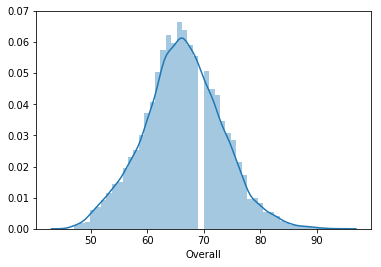

In [17]:
#visualize data (plot distribution of overall rating)
sns.distplot(data['Overall'])

C:\Users\shivam\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


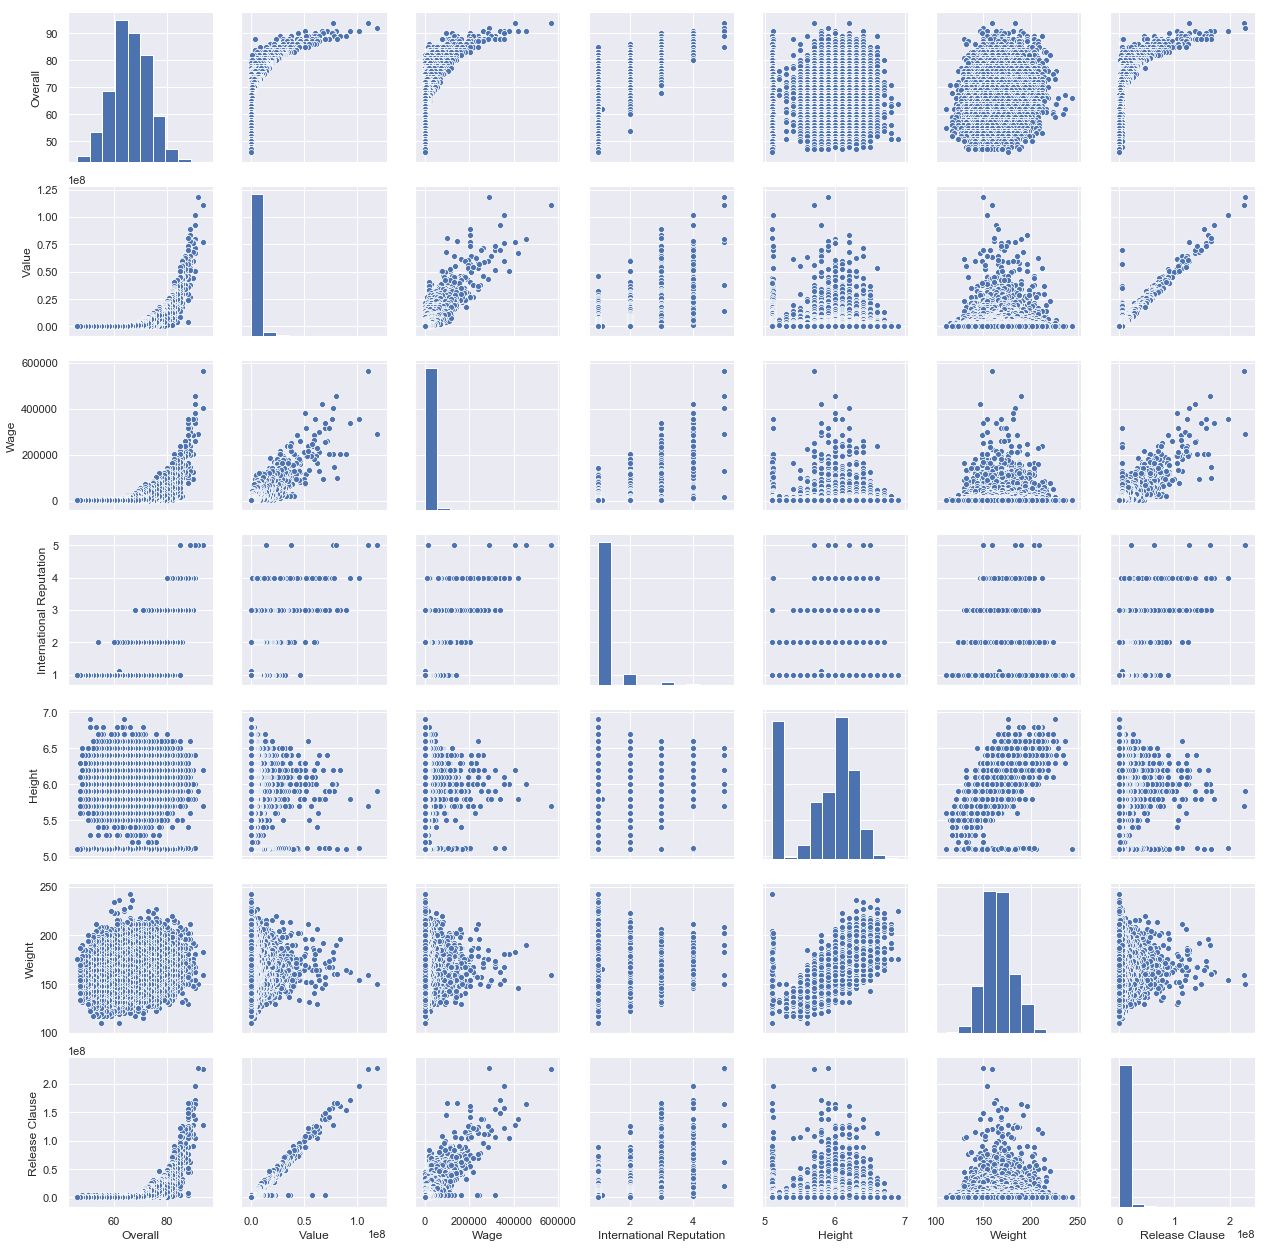

In [18]:
#pair plot
sns.set()
cols = ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [19]:
#selecting players whose contract expires in 2020
rslt = data.loc[data['Contract Valid Until'].dt.year == pd.to_datetime('01-01-2020').year] 

In [20]:
#selecting top 20 players based on overall
rslt = data.sort_values('Overall',ascending = False).head(20)

In [21]:
#average wage of this set of player in euros
rslt['Wage'].mean(skipna = True)

294950.0

In [22]:
#avergae mean of age for this set
rslt['Age'].mean(skipna = True)

29.55

In [23]:
#checking correlation between cols
rslt['Overall'].corr(rslt['Value'])

0.6222118097990474

In [24]:
#selecting top5 players for unique position
rslt1 = data.sort_values('Overall',ascending = False).groupby('Position').head(5)

In [25]:
rslt1['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'CB', 'LCM',
       'CDM', 'LCB', 'LS', 'CAM', 'LDM', 'LB', 'LM', 'LAM', 'RM', 'RDM',
       'CM', 'RB', 'RW', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [26]:
#drop na from rslt1
rslt1['Position'].dropna(inplace=True)

In [27]:
#average wage one can expect to pay for the top 5 in every position
rslt1.groupby(['Position']).Wage.mean()

Position
CAM    174000.0
CB     124800.0
CDM    199200.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    195400.0
LDM    138000.0
LF     123200.0
LM     169000.0
LS     130600.0
LW     261000.0
LWB     33000.0
RAM     46600.0
RB     155400.0
RCB    219000.0
RCM    257400.0
RDM    105000.0
RF     148000.0
RM     133000.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

In [28]:
# duplicate names 4(a)
duplicateRowsDF = rslt1[rslt1.duplicated(['Name'])]

In [29]:
#no player duplicate
duplicateRowsDF

,ID,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
